In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

pathinput = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/input'
pathtrain = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/input/train.csv.gz'
pathtest = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/input/test.csv.gz'
pathsample = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/input/sampleSubmission.csv'
pathcovar = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/input/my_photoz_test.csv'
pathoutput = 'C:/Users/Lordpb/Documents/GitHub/Kaggle-Phys-Photoz/output/sdss_predict.csv'

import os
print(os.listdir(pathinput))

# Any results you write to the current directory are saved as output.

['my_photoz_test.csv', 'sampleSubmission.csv', 'test.csv.gz', 'train.csv.gz']


In [9]:
df = pd.read_csv(pathtrain)  # load train data
x = df[['u','g','r','i','z']].values.T  # format x as scipy expects it
y = df['redshift'].values  # format y as scipy expects it

In [10]:
model = RandomForestRegressor()
model.fit(x.T,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
testdf =  pd.read_csv(pathtest)  # read test data 
x_train = testdf[['u','g','r','i','z']].values  # get test x
y_pred = model.predict(x_train)

# write y in the sample submission table (order is good)
resultdf =  pd.read_csv(pathsample) 
resultdf['redshift'] =  y_pred

# save submission (no index column)
resultdf.to_csv(pathoutput, index=False)

In [12]:
# Wrapwrapper
def testReg(y_pred):
    
    testBT =  pd.read_csv(pathcovar)  # read BT test data
    y_bt = testBT['redshift'].values

    plt.plot(y_pred,y_bt,'.')  # plot data points
    plt.plot([-3,3],[-3,3])  # y = x line for reference
    plt.xlabel('Z measured')  # label, labels, labels
    plt.ylabel('Z predicted') # and labels
    
    print('RMSE:',((y_pred-y_bt)**2).mean()**0.5)  # primary metric
    print('Pearson corr:',np.corrcoef(y_pred,y_bt)[0,1])  # another one

RMSE: 0.0392944223926
Pearson corr: 0.978591093187


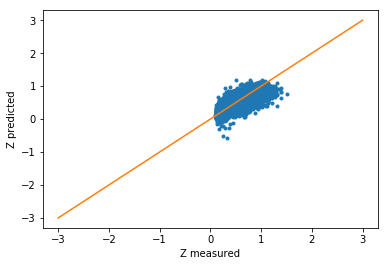

In [13]:
testReg(y_pred)